# Neural Network for Regression (predict next character in a word) exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [HW page](http://kovan.ceng.metu.edu.tr/~sinan/DL/index.html) on the course website.*

Having gained some experience with neural networks, let us train a network that predicts the next character given a set of characters in a text.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from metu.data_utils import load_nextchar_dataset, plain_text_file_to_dataset
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
from cs231n.classifiers.neural_net_for_regression import TwoLayerNet

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([[0, 1, 2], [1, 2, 3], [2, 3, 4], [2, 1, 4], [2, 1, 4]])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net_for_regression.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the previous exercises: It takes the data and weights and computes the *regression* scores, the squared error loss, and the gradients on the parameters. 

To be more specific, you will implement the following loss function:

$$\frac{1}{2}\sum_i (o_i - y_i)^2 + \frac{1}{2}\lambda\sum_j w_j^2,$$

where $i$ runs through the samples in the batch; $o_i$ is the prediction of the network for the $i^{th}$ sample, and $y_i$ is the correct character; $\lambda$ is the weight of the regularization term.

The first layer uses ReLU as the activation function. The output layer does not use any activation functions.

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209255e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 66.3406756909

# should be very small, we get < 1e-10
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

Difference between your loss and correct loss:
2.54800625044e-11


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name])
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

b2 max relative error: 1.443387e-06
W2 max relative error: 3.755046e-04
W1 max relative error: 5.463838e-04
b1 max relative error: 2.188996e-07


# Load a dataset for training a simple regression network

In [6]:
# Load the TEXT data
# If your memory turns out to be sufficient, try the following:
#def get_nextchar_data(training_ratio=0.6, val_ratio=0.1):
def get_nextchar_data(training_ratio=0.1, test_ratio=0.06, val_ratio=0.01):
  # Load the nextchar training data 
  X, y = load_nextchar_dataset(nextchar_datafile)
  # Subsample the data
  length=len(y)
  num_training=int(length*training_ratio)
  num_val = int(length*val_ratio)
  num_test = min((length-num_training-num_val), int(length*test_ratio))
  mask = range(num_training-1)
  X_train = X[mask]
  y_train = y[mask]
  mask = range(num_training, num_training+num_test)
  X_test = X[mask]
  y_test = y[mask]
  mask = range(num_training+num_test, num_training+num_test+num_val)
  X_val = X[mask]
  y_val = y[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

nextchar_datafile = 'metu/dataset/nextchar_data.pkl'
input_size = 5 # Size of the input of the network
#plain_text_file_to_dataset("metu/dataset/ince_memed_1.txt", nextchar_datafile, input_size)
plain_text_file_to_dataset("metu/dataset/shakespeare.txt", nextchar_datafile, input_size)
X_train, y_train, X_val, y_val, X_test, y_test = get_nextchar_data()
print "Number of instances in the training set: ", len(X_train)
print "Number of instances in the validation set: ", len(X_val)
print "Number of instances in the testing set: ", len(X_test)

Converting plain text file to trainable dataset (as pickle file)
Processing file metu/dataset/shakespeare.txt as input
input_size parameter (i.e. num of neurons) will be 5
Writing data and labels to file metu/dataset/nextchar_data.pkl
Loading X and Y from pickle file metu/dataset/nextchar_data.pkl
Number of instances in the training set:  37647
Number of instances in the validation set:  3764
Number of instances in the testing set:  22589


In [7]:
# We have loaded the dataset. That wasn't difficult, was it? :)
# Let's look at a few samples
#
from metu.data_utils import int_list_to_string, int_to_charstr

print "Input - Next char to be predicted"
for i in range(1,10):
    print int_list_to_string(X_train[i]) + " - " + int_list_to_string(y_train[i])

Input - Next char to be predicted
HE SO - N
E SON - N
 SONN - E
SONNE - T
ONNET - S
by Wi - l
y Wil - l
 Will - i
Willi - a


# Now train our network on the nextchar dataset

In [11]:
# Now, let's train a neural network

input_size = input_size
hidden_size = 10000
num_classes = 1
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=10,
            learning_rate=5e-8, learning_rate_decay=0.85,
            reg=0.5, verbose=True)

# Predict on the validation set
val_err = np.sum(np.square(net.predict(X_val) - y_val), axis=1).mean()
print 'Validation error: ', val_err

iteration 0 / 5000: loss 37187.627088
iteration 100 / 5000: loss 41618.726517
iteration 200 / 5000: loss 46902.052758
iteration 300 / 5000: loss 36600.527110
iteration 400 / 5000: loss 41589.205666
iteration 500 / 5000: loss 31541.751631
iteration 600 / 5000: loss 31119.044458
iteration 700 / 5000: loss 12565.962976
iteration 800 / 5000: loss 6146.395640
iteration 900 / 5000: loss 9413.233288
iteration 1000 / 5000: loss 3986.842478
iteration 1100 / 5000: loss 5945.184059
iteration 1200 / 5000: loss 3789.734761
iteration 1300 / 5000: loss 2967.399594
iteration 1400 / 5000: loss 2646.505533
iteration 1500 / 5000: loss 9239.648860
iteration 1600 / 5000: loss 3592.429379
iteration 1700 / 5000: loss 2670.583491
iteration 1800 / 5000: loss 4167.035028
iteration 1900 / 5000: loss 7859.230652
iteration 2000 / 5000: loss 6017.866565
iteration 2100 / 5000: loss 4559.230080
iteration 2200 / 5000: loss 8136.270938
iteration 2300 / 5000: loss 3252.340444
iteration 2400 / 5000: loss 4012.090902
iter

# Debug the training
I have managed to get a loss below 10,000 and a validation error of about 1100 on the validation set (by playing around the parameters a little bit). However, this isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

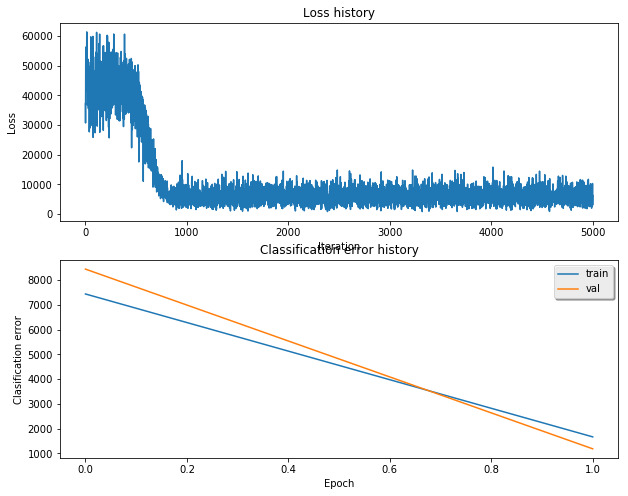

In [12]:
# Plot the loss function and train / validation errors
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
train = plt.plot(stats['train_err_history'], label='train')
val = plt.plot(stats['val_err_history'], label='val')
plt.legend(loc='upper right', shadow=True)
plt.title('Classification error history')
plt.xlabel('Epoch')
plt.ylabel('Clasification error')
plt.show()

In [13]:
# Show some sample outputs:

print "Input - predicted char - true char"
for i in range(1,10):
    print int_list_to_string(X_val[i]) + " - "  \
        + int_list_to_string([int(x) for x in net.predict(X_val[i])]) \
        + " - " + int_list_to_string(y_val[i])

Input - predicted char - true char
 mark - Z -  
mark  - \ - t
ark t - ` - h
rk th - ^ - e
k the - \ -  
 the  - L - m
the m - ` - a
he ma - X - n
e man - Z - n
